# k-NN

Here's some code to generate a mixture of gaussians. Each point is associated with one 2D gaussian distribution with fixed center and dispersion matrix. The label of the point corresponds to the center of its distribution. A plot is made showing the 3 categories

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as sms

# Set the parameters for each Gaussian
means = [
    [2, 2],   # Mean of the first Gaussian
    [-1, -1], # Mean of the second Gaussian
    [3, -3]   # Mean of the third Gaussian
]
covariances = [
    [[1, 0.5], [0.5, 1]],  # Covariance of the first Gaussian
    [[1, -0.3], [-0.3, 1]], # Covariance of the second Gaussian
    [[1, 0.2], [0.2, 1]]   # Covariance of the third Gaussian
]
n_samples = 300  # Samples per Gaussian

# Generate data
data = []
labels = []
for i, (mean, cov) in enumerate(zip(means, covariances)):
    points = np.random.multivariate_normal(mean, cov, n_samples)
    data.append(points)
    labels += [i] * n_samples  # Label each Gaussian with a different number

# Combine all the data
data = np.vstack(data)
labels = np.array(labels)


# Make a Train Test Split

In [39]:
X_train, X_test, y_train, y_test= sms.train_test_split(data, labels, test_size=0.2)

## Plot the train data

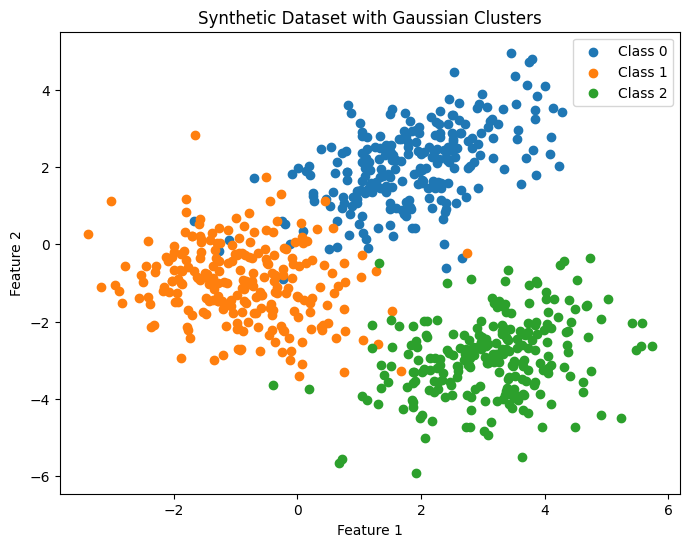

In [41]:

# Visualize the data
plt.figure(figsize=(8, 6))
for i in range(len(means)):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=f'Class {i}')
#for i in range(len(means)):
#    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Class ?')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset with Gaussian Clusters')
plt.show()

Write a knn_label method. Input

* X_train
* y_train
* X
* y

It finds and returns the label yhat by finding the 1 nearest neighbor to X in X_train and assigning the label of X_train[best] to yhat.

In [31]:
def knn_label(X_train, y_train, X, y):
    distances = [(np.linalg.norm(x-X),i) for (i,x) in enumerate(X_train)]
    closest =  min(distances)[1]
    return y_train[closest], y

Print out rows for each test data point in the format

T/F, X1, X2, y, yhat

where T/F is true if y==yhat

In [37]:
for x,y in zip(X_test, y_test):
    yhat, y = knn_label(X_train, y_train,x,y)
    print (yhat==y, x, yhat, y)

True [-2.2243037  -1.58219275] 1 1
True [ 2.93661393 -3.88412229] 2 2
True [ 2.77698641 -3.77545678] 2 2
True [ 2.3779797  -4.47642124] 2 2
True [4.63947347 5.17395636] 0 0
True [ 0.4095228  -0.07170065] 0 0
True [1.34894468 0.03948044] 0 0
True [1.17180056 2.51132272] 0 0
True [ 4.06248544 -3.25360204] 2 2
True [ 1.6477978  -3.72028249] 2 2
True [ 3.21867077 -1.9297869 ] 2 2
True [ 3.49068138 -4.05720249] 2 2
True [1.0514087  1.59773135] 0 0
True [ 0.82478964 -3.98156322] 2 2
True [ 3.14135533 -3.14009891] 2 2
False [ 1.32440819 -2.82296856] 2 1
True [1.70492056 3.12533947] 0 0
True [-0.03852606 -2.18147136] 1 1
True [ 3.91693705 -2.55643321] 2 2
True [ 3.63443718 -2.64484798] 2 2
True [0.94112457 1.07802999] 0 0
True [2.90788189 3.19332002] 0 0
True [ 1.48107259 -2.59079495] 2 2
True [ 2.52831418 -1.84978837] 2 2
True [2.17331304 1.29193309] 0 0
True [ 2.55692557 -3.39319357] 2 2
True [-1.49898111  0.7519942 ] 1 1
True [ 2.27797202 -4.01983315] 2 2
True [ 0.33498396 -0.95000382] 1 1


Come up with a nice way to visualize the location of the test points. Mislabeled points should be clearly visible by some graphic attribute.

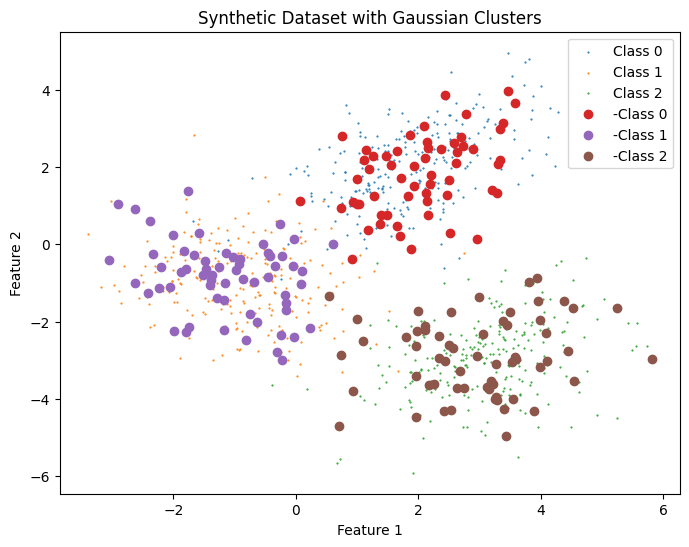

In [44]:
# Visualize the data
plt.figure(figsize=(8, 6))
for i in range(len(means)):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], label=f'Class {i}', s=0.3)
#for i in range(len(means)):
#    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'Class ?')
yhat = []
for x,y in zip(X_test, y_test):
    yh, y = knn_label(X_train, y_train,x,y)
    yhat += [yh]
for i in range(len(means)):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], label=f'-Class {i}')
    
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset with Gaussian Clusters')
plt.show()

## Extension

Expand this technique. You could 

* compute k-nn with k>1 and analyze the error rate as a function of k
* create d-dimensional datasets and analyze the error rate as a function of d (in this case your number of point should also scale appropriately to acheive a similar density)
* Vary the centers or dispersions of the distributions and analyze the error
* Vary the number of distributions AND also k. Is there a relation?